## Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
# !wget $url

In [3]:
df = pd.read_csv("laptops.csv")

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [7]:
for column in df.columns:
    uniq = df[column].unique()

    print("---")
    print(column)
    print(f"Unique value count: {len(uniq)}")
    print(uniq[:5])

---
laptop
Unique value count: 2160
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"']
---
status
Unique value count: 2
['New' 'Refurbished']
---
brand
Unique value count: 27
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo']
---
model
Unique value count: 121
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair']
---
cpu
Unique value count: 28
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5']
---
ram
Unique value count: 9
[ 8 16 32 12  4]
---
storage
Unique value count: 12
[ 512  256 1000   64  128]
---
storage_type
Unique value count: 3
['SSD' 'eMMC' nan]
---
gpu
Unique value count: 45
[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060']
---
screen
Unique value count: 30
[15.6 

### Distribution of prices

<Axes: xlabel='final_price', ylabel='Count'>

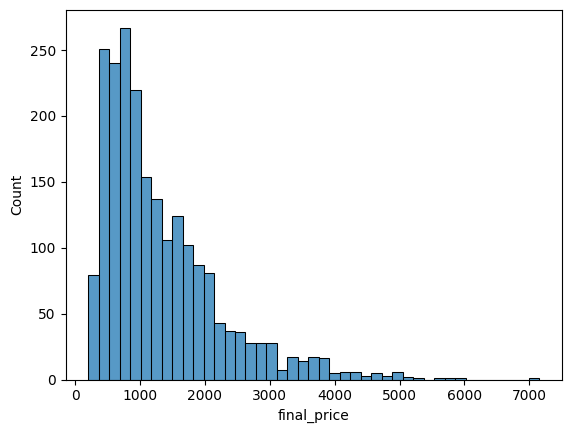

In [8]:
sns.histplot(df["final_price"])

In [9]:
df[df.final_price > 6000]

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,No,7150.47


<Axes: xlabel='final_price', ylabel='Count'>

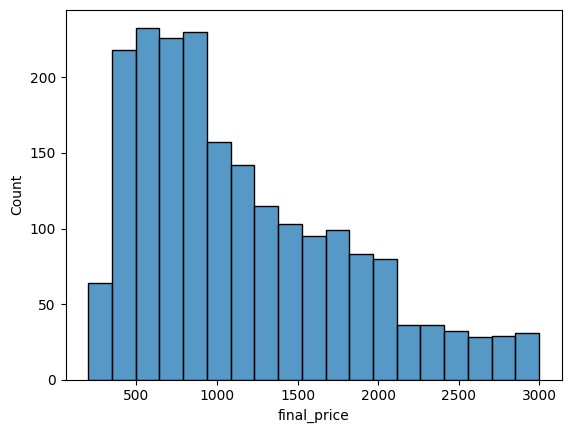

In [10]:
sns.histplot(df[df.final_price < 3000]["final_price"])

### Convert price distribution to logarithm distribution to not to confuse the model

In [ ]:
np.log([0 + 1, 1 + 1, 10 + 1, 100000 + 1, 10000000 + 1])

array([ 0.        ,  0.69314718,  2.39789527, 11.51293546, 16.11809575])

In [12]:
np.log1p([0, 1, 10, 100000, 10000000])

array([ 0.        ,  0.69314718,  2.39789527, 11.51293546, 16.11809575])

In [13]:
price_logs = np.log1p(df.final_price)
price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

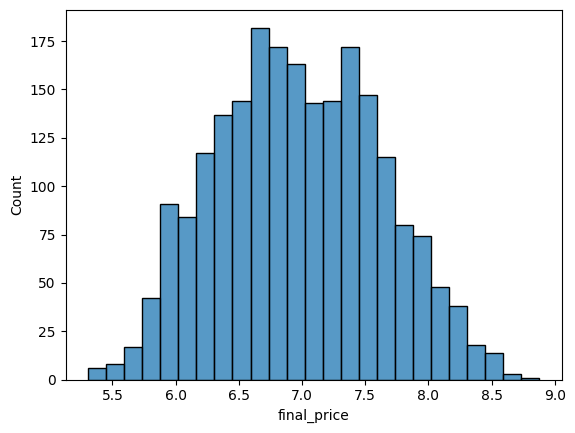

In [14]:
sns.histplot(price_logs)

In [15]:
# Missing values:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

## Setting Up The Validation Framework

### Divide the dataset into three parts: 60% training, 20% validation, 20% test

In [16]:
len(df)

2160

In [17]:
items_count = len(df)
validation_items_count = int(items_count * 0.2)
test_items_count = int(items_count * 0.2)
train_items_count = items_count - validation_items_count - test_items_count
train_items_count, validation_items_count, test_items_count

(1296, 432, 432)

In [18]:
df_train = df.iloc[:train_items_count]
len(df_train)

1296

In [19]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Acer Extensa 15 EX215-53G-56MT Intel Core i5-1...,New,Acer,Extensa,Intel Core i5,8,256,SSD,MX 330,15.6,No,689.08
1292,Acer Extensa 15 EX215-54-34HR Intel Core i3-11...,New,Acer,Extensa,Intel Core i3,8,256,SSD,NaN,15.6,No,481.60
1293,Acer Extensa 15 EX215-54-50UV Intel Core i5-11...,New,Acer,Extensa,Intel Core i5,8,512,SSD,NaN,15.6,No,541.55
1294,Acer TravelMate P2 Intel Core i5-1135G7/8GB/51...,New,Acer,TravelMate,Intel Core i5,8,512,SSD,NaN,14.0,No,803.61


In [20]:
df_validation = df.iloc[train_items_count:train_items_count + validation_items_count]
df_validation

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1296,Acer TravelMate P2 P215-53-54GL Intel Core i5-...,New,Acer,TravelMate,Intel Core i5,8,512,SSD,NaN,15.6,No,789.84
1297,Acer TravelMate P2 TMP214-52-77KP Intel Core i...,New,Acer,TravelMate,Intel Core i7,8,512,SSD,NaN,14.0,No,714.29
1298,Acer TravelMate P2 TMP215-53 Intel Core i5-113...,New,Acer,TravelMate,Intel Core i5,8,256,SSD,NaN,15.6,No,691.97
1299,Acer TravelMate TMP215-52 Intel Core i3-10110U...,New,Acer,TravelMate,Intel Core i3,8,256,SSD,NaN,15.6,No,547.19
1300,Asus ROG Strix SCAR 17 G733QS-K4016T AMD Ryzen...,Refurbished,Asus,ROG,AMD Ryzen 9,32,1000,SSD,RTX 3080,17.3,No,2052.74
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Acer Nitro 5 AN515-57-75M9 Intel Core i7-11800...,Refurbished,Acer,Nitro,Intel Core i7,16,512,SSD,RTX 3050,15.6,No,1199.00
1724,Acer Nitro 5 AN515-58-730H Intel Core i7-12700...,Refurbished,Acer,Nitro,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No,1599.00
1725,Acer Nitro 5 AN517-41-R37U AMD Ryzen 7 5800H/1...,Refurbished,Acer,Nitro,AMD Ryzen 7,16,1000,SSD,RTX 3070,17.3,No,1214.63
1726,Acer Nitro 5 AN517-52-73SP Intel Core i7-10750...,Refurbished,Acer,Nitro,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,966.04


In [21]:
df_test = df.iloc[items_count - test_items_count:items_count]
df_test

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1728,Acer Predator Helios 300 PH315-53-72T7 Intel C...,Refurbished,Acer,Predator,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No,914.64
1729,Acer Predator Helios 300 PH315-54-76XV Intel C...,Refurbished,Acer,Predator,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No,1098.29
1730,Acer Predator Helios 300 PH315-54-784L Intel C...,Refurbished,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3070,15.6,No,1344.69
1731,Acer Predator Triton 500 SE PT516-51s-74PZ Int...,Refurbished,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3060,16.0,No,1751.09
1732,Apple MacBook Air Intel Core i3/8GB/256GB SSD/...,Refurbished,Apple,MacBook Air,Intel Core i3,8,256,SSD,NaN,13.3,No,710.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Shuffle the dataset to avoid the similar rows in the data subsets

In [22]:
indices = np.arange(items_count)
indices

array([   0,    1,    2, ..., 2157, 2158, 2159], shape=(2160,))

In [23]:

rng = np.random.default_rng(seed=2)  # Create a random number generator with a fixed seed
indices = rng.permutation(items_count)  # Generate a reproducible shuffled array of indices

indices

array([ 289,  772, 1589, ...,  286,  356,  840], shape=(2160,))

In [24]:
indices[:train_items_count]

array([ 289,  772, 1589, ..., 1729,  713,  580], shape=(1296,))

In [25]:
df_train = df.iloc[indices[:train_items_count]]
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
289,Acer Aspire 3 A314-36P-30XR Intel Core i3-N305...,New,Acer,Aspire,Intel Core i3,8,512,SSD,NaN,14.0,No,599.00
772,Lenovo ThinkPad E15 Gen 4 Intel Core i7-1255U/...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,MX 550,15.6,No,1405.19
1589,Lenovo Yoga Slim 7 Pro 14IHU5 Intel Evo Core i...,New,Lenovo,Yoga,Intel Evo Core i7,16,512,SSD,NaN,14.0,No,1625.28
512,MSI Creator Z16 HX Studio B13VFTO-046ES Intel ...,New,MSI,Creator,Intel Core i7,16,1000,SSD,RTX 4060,16.0,Yes,2649.00
427,Lenovo V15 Gen 2 ALC AMD Ryzen 3 5300U/8GB/512...,New,Lenovo,V15,AMD Ryzen 3,8,512,SSD,NaN,15.6,No,399.00
...,...,...,...,...,...,...,...,...,...,...,...,...
839,Medion Akoya S15447 Intel Core i5-10210U/8 GB/...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,727.49
1889,HP EliteBook 840 G4 Intel Core i7-7500U/8GB/2...,Refurbished,HP,EliteBook,Intel Core i7,8,256,SSD,NaN,14.0,No,538.00
1729,Acer Predator Helios 300 PH315-54-76XV Intel C...,Refurbished,Acer,Predator,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No,1098.29
713,HP 15S-FQ5044NS Intel Core i7-1255U/8GB/512GB ...,New,HP,15S,Intel Core i7,8,512,SSD,NaN,15.6,No,730.01


In [26]:
df_validation = df.iloc[indices[train_items_count:train_items_count + validation_items_count]]
df_validation

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1795,Asus Rog Strix G17 G713QR-HG053 AMD Ryzen 9 59...,Refurbished,Asus,ROG,AMD Ryzen 9,32,1000,SSD,RTX 3070,17.3,No,1999.00
508,ASUS VivoBook 16X M1603QA-MB155 AMD Ryzen 5 56...,New,Asus,VivoBook,AMD Ryzen 5,8,512,SSD,NaN,16.0,No,437.87
636,Lenovo Yoga Slim 7 Pro 14ARH7 AMD Ryzen 5 6600...,New,Lenovo,Yoga,AMD Ryzen 5,8,512,SSD,NaN,14.0,No,979.00
579,Alurin Flex Advance AMD Ryzen 5 5500U/8GB/256G...,New,Alurin,Flex Advance,AMD Ryzen 5,8,256,SSD,NaN,15.6,No,399.00
1994,Lenovo V330-15IKB Intel Core i3-8130U/4GB/128G...,Refurbished,Lenovo,V330,Intel Core i3,4,128,SSD,NaN,15.6,No,499.49
...,...,...,...,...,...,...,...,...,...,...,...,...
877,MSI Stealth 14 Studio A13VG-048ES Intel Core i...,New,MSI,Stealth,Intel Core i7,32,1000,SSD,RTX 4070,14.0,No,2699.00
997,Asus VivoBook F1605PA-MB145 Intel Core i5-1130...,New,Asus,VivoBook,Intel Core i5,8,256,SSD,NaN,16.0,No,469.90
1110,ASUS VivoBook 17 F1704VA-AU116W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,16,512,SSD,NaN,17.3,No,912.00
1406,HP 15S-fq2133ns Intel Core i3-1115G4/8GB/256GB...,New,HP,15S,Intel Core i3,8,256,SSD,NaN,15.6,No,432.26


In [27]:
df_test = df.iloc[indices[items_count - test_items_count:]]
df_test

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
850,Acer Aspire 3 A315-56-56XH Intel Core i5-1035G...,New,Acer,Aspire,Intel Core i5,8,512,SSD,NaN,15.6,No,552.99
418,ASUS VivoBook 15 F1500EA-EJ3108W Intel Core i5...,New,Asus,VivoBook,Intel Core i5,16,1000,SSD,NaN,15.6,No,665.00
1798,Asus Rog Strix SCAR 17 G732LXS-HG066T Intel Co...,Refurbished,Asus,ROG,Intel Core i9,32,1000,SSD,RTX 2080,17.3,No,1770.24
1851,Gigabyte A7 X1-CES1130SH AMD Ryzen 9 5900HX/16...,Refurbished,Gigabyte,A7,AMD Ryzen 9,16,512,SSD,RTX 3070,17.3,No,1295.89
408,HP OMEN 16-b1025ns Intel Core i7-12700H/32GB/1...,New,HP,Omen,Intel Core i7,32,1000,SSD,RTX 3070,16.1,No,1999.00
...,...,...,...,...,...,...,...,...,...,...,...,...
37,ASUS Chromebook CX1500CNA-EJ0100 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,64,eMMC,NaN,15.6,No,399.00
1237,ASUS ROG Flow X13 GV301QC-K6120T AMD Ryzen 9 5...,New,Asus,ROG,AMD Ryzen 9,32,1000,SSD,RTX 3050,13.4,Yes,3943.37
286,MSI Creator Z17 HX Studio A13VFT-048ES Intel C...,New,MSI,Creator,Intel Core i9,32,1000,SSD,RTX 4060,17.0,Yes,2979.01
356,ASUS ROG Strix G17 G713RS-LL042 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,32,1000,SSD,RTX 3080,17.3,No,2999.00


### Specify the target vector

In [28]:
df_train["final_price"].values

array([ 599.  , 1405.19, 1625.28, ..., 1098.29,  730.01,  719.01],
      shape=(1296,))

In [29]:
y_train = np.log1p(df_train["final_price"].values)
y_train

array([6.39692966, 7.2486392 , 7.39405048, ..., 7.0024198 , 6.59442714,
       6.5792651 ], shape=(1296,))

In [30]:
y_validation = np.log1p(df_validation["final_price"].values)
y_validation

array([7.60090246, 6.08420324, 6.88755257, 5.99146455, 6.21558762,
       6.49543171, 7.86172708, 6.66840612, 7.52342729, 6.64639051,
       6.80240587, 6.90654455, 5.34705991, 6.43380788, 7.80454102,
       7.60090246, 7.42177579, 7.54960917, 6.3473717 , 7.09007684,
       6.91708165, 6.90775528, 6.85646198, 6.77992191, 7.78322402,
       6.56640516, 7.03697489, 6.44000511, 7.30040529, 6.7580945 ,
       7.69620809, 7.46584419, 7.77904864, 7.25289697, 6.1737861 ,
       6.65234677, 7.66890217, 7.54446437, 5.71046013, 7.37775891,
       6.58191433, 7.83114873, 6.83087423, 7.34847169, 6.55108034,
       6.99176549, 6.75924367, 6.12080279, 6.39692966, 6.13120475,
       7.27257893, 8.29404964, 5.91579767, 6.20724103, 6.9445307 ,
       6.39972574, 7.04751722, 6.78670566, 7.98956045, 7.73280753,
       8.24275635, 5.94001335, 6.92877285, 7.05455328, 7.36795475,
       6.90775528, 5.91889385, 6.27287701, 5.65045202, 7.05875815,
       8.41183268, 6.03030057, 6.5220928 , 7.29574186, 7.89095

In [31]:
y_test = np.log1p(df_test["final_price"].values)
y_test

array([6.31714664, 6.50128967, 7.47943515, 7.16772437, 7.60090246,
       7.27217615, 6.32793678, 6.57646957, 6.10924758, 6.90775528,
       6.9246124 , 7.50659727, 6.62007321, 8.36660051, 8.03915739,
       6.53077558, 6.57204475, 7.7526703 , 7.08504754, 6.64260413,
       5.86078622, 7.48380669, 6.37842618, 7.40853057, 6.28821166,
       5.70378247, 6.74523635, 6.36304534, 6.62007321, 6.37570602,
       6.17263961, 7.37149558, 6.17376527, 6.83085264, 5.84643878,
       7.43838353, 6.67203295, 6.80240587, 7.31322039, 6.55108034,
       7.43248381, 7.56664222, 5.82894562, 7.15355229, 7.56320059,
       7.15140709, 5.88607625, 7.69635354, 6.90775528, 7.00949023,
       5.73006731, 7.31385352, 6.66939656, 8.29404964, 7.54960917,
       6.69948802, 7.43838353, 6.47870932, 7.60090246, 6.30261898,
       7.60090246, 7.53369371, 6.6066637 , 7.53508312, 8.43381158,
       6.99393298, 8.2160881 , 7.91935619, 6.2915321 , 7.52264898,
       7.54430036, 7.68708016, 7.52294092, 6.90902447, 7.11780

### Remove the column "final_price" from the feature matrix to avoid data leakage

In [32]:
del(df_train["final_price"])
del(df_validation["final_price"])
del(df_test["final_price"])
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
289,Acer Aspire 3 A314-36P-30XR Intel Core i3-N305...,New,Acer,Aspire,Intel Core i3,8,512,SSD,NaN,14.0,No
772,Lenovo ThinkPad E15 Gen 4 Intel Core i7-1255U/...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,MX 550,15.6,No
1589,Lenovo Yoga Slim 7 Pro 14IHU5 Intel Evo Core i...,New,Lenovo,Yoga,Intel Evo Core i7,16,512,SSD,NaN,14.0,No
512,MSI Creator Z16 HX Studio B13VFTO-046ES Intel ...,New,MSI,Creator,Intel Core i7,16,1000,SSD,RTX 4060,16.0,Yes
427,Lenovo V15 Gen 2 ALC AMD Ryzen 3 5300U/8GB/512...,New,Lenovo,V15,AMD Ryzen 3,8,512,SSD,NaN,15.6,No
...,...,...,...,...,...,...,...,...,...,...,...
839,Medion Akoya S15447 Intel Core i5-10210U/8 GB/...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No
1889,HP EliteBook 840 G4 Intel Core i7-7500U/8GB/2...,Refurbished,HP,EliteBook,Intel Core i7,8,256,SSD,NaN,14.0,No
1729,Acer Predator Helios 300 PH315-54-76XV Intel C...,Refurbished,Acer,Predator,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No
713,HP 15S-FQ5044NS Intel Core i7-1255U/8GB/512GB ...,New,HP,15S,Intel Core i7,8,512,SSD,NaN,15.6,No
